In [843]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [844]:
# Reading data in dataframe

bike_df = pd.read_csv('day.csv')

bike_df.shape

(730, 16)

##### Inference:- There are 730 rows and 16 columns in the original data file.

In [845]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [846]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [847]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


##### Inference:- Most of the columns are stored as numeric types. However, from the data dictionary we know that some columns shall be treated as category type.

## Cleaning Data

#### 1. We will drop off columns such as instant as it is only an index column.
#### 2. dteday column can be dropped off as we already have month and year captured in mnth, yr columns.
#### 3. casual & registered columns are redundant as we have total count in cnt column. These columns can also be dropped.

In [848]:
# Dropping redundant columns from the dataframe

bike_df.drop(['instant', 'dteday','casual', 'registered'], axis=1, inplace=True)
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [849]:
bike_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

##### Inference:- It is clear from the above outputs that the specified columns have been dropped.

### Finding null values

In [850]:
# using isnull > sum function to get the count of null values.
bike_df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

##### Inference:- The sum is 0. Hence there are no null values present.

### Checking for outlier values

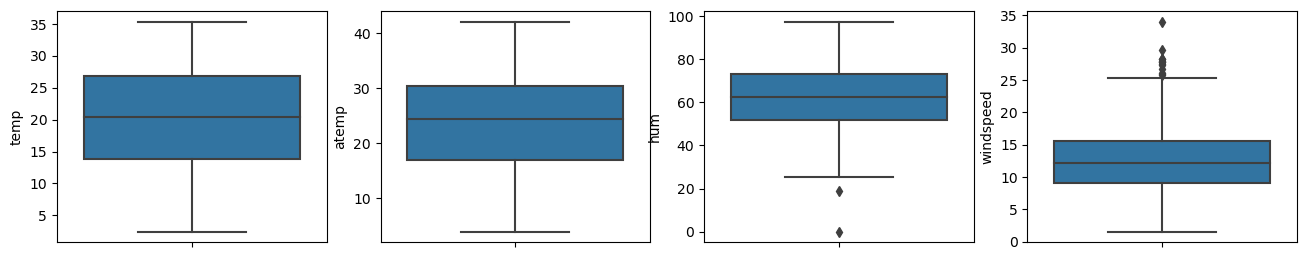

In [851]:
num_cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(16,3))

i = 1
for num_col in num_cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=num_col, data=bike_df)
    i += 1

##### Inference:- Outlier values don't seem to be a problem as shown in above box plots. We can proceed with the data analysis with all the rows available in the dataset.

As mentioned earlier, some columns contain numeric values but are category types. For example:-

1. Four seasons spring, summer, fall, winter are stored as 1:spring, 2:summer, 3:fall, 4:winter
2. mnth column stores months from Jan to Dec in numeric values from 1 to 12
3. Days of the weeks are stored in numeric format in weekday column
4. weathersit column has numeric data to represent different weather situation:-

        1: Clear, Few clouds, Partly cloudy, Partly cloudy
        2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
        3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
        4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

First of all, these numeric values will be replaced with the actual values they represent

In [852]:
# Replacing numeric values with categorical values

# Fillilng season names
bike_df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

# Filling month names
bike_df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'}, inplace = True)

# Filling weekdays
bike_df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'}, inplace = True)

# Filling weather condition 
bike_df.weathersit.replace({1:'clear',2:'mist',3:'snow',4:'severe'},inplace = True)

bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [853]:
# Setting type as category for above columns

bike_df['season'] = bike_df['season'].astype('category')
bike_df['mnth'] = bike_df['mnth'].astype('category')
bike_df['weekday'] = bike_df['weekday'].astype('category')
bike_df['weathersit'] = bike_df['weathersit'].astype('category')

In [854]:
# In addition to the above columns, we can also consider converting holiday, workingday & yr to category type.

bike_df['holiday'] = bike_df['holiday'].astype('category')
bike_df['workingday'] = bike_df['workingday'].astype('category')
bike_df['yr'] = bike_df['yr'].astype('category')

bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    category
 2   mnth        730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(7), float64(4), int64(1)
memory usage: 35.1 KB


##### Inference:- Dtype is now correctly set for columns

## Exploratory Data Analysis


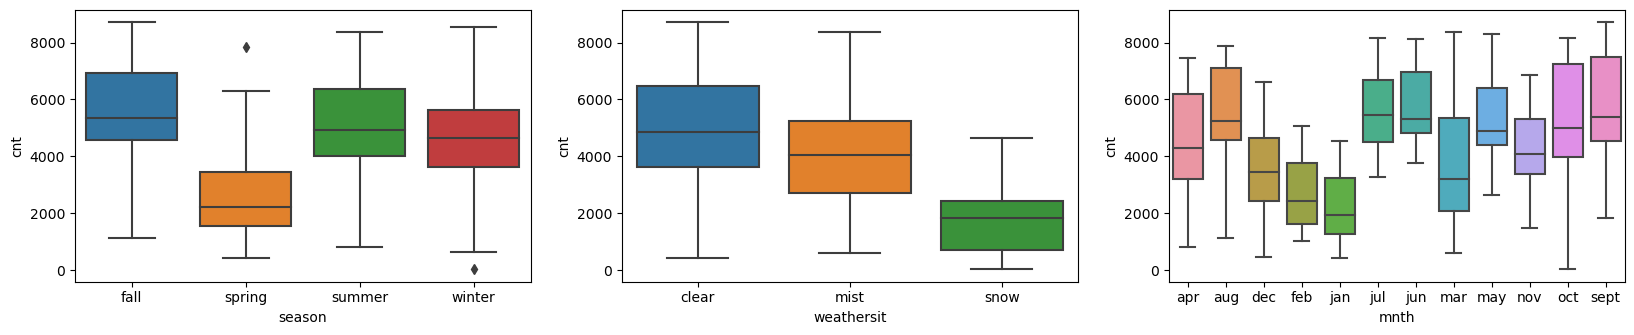

In [855]:
categorical_cols = ['season','weathersit','mnth']
plt.figure(figsize=(20, 12))
for i in enumerate(categorical_cols):
    plt.subplot(3, 3, i[0]+1)
    sns.boxplot(data=bike_df, x=i[1], y='cnt')
plt.show()

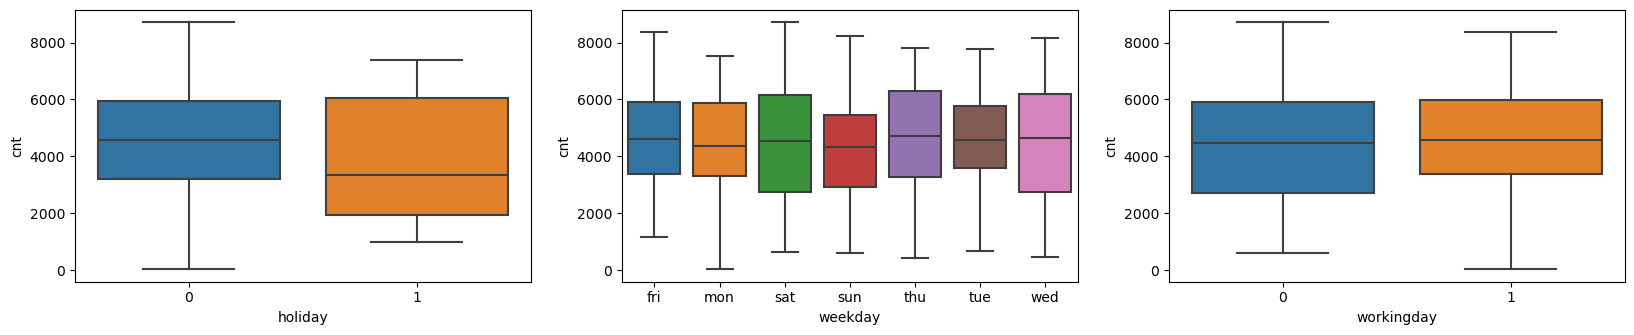

In [856]:
categorical_cols = ['holiday','weekday','workingday']
plt.figure(figsize=(20, 12))
for i in enumerate(categorical_cols):
    plt.subplot(3, 3, i[0]+1)
    sns.boxplot(data=bike_df, x=i[1], y='cnt')
plt.show()

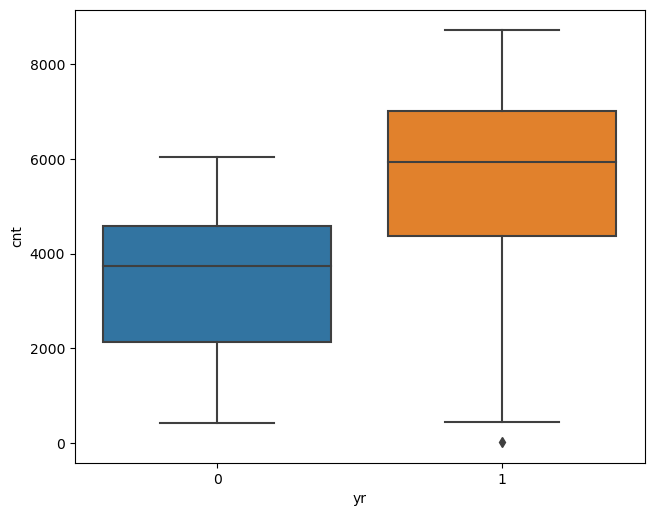

In [857]:
plt.figure(figsize=(25, 20))
plt.subplot(3, 3, i[0]+1)
sns.boxplot(data=bike_df, x='yr', y='cnt')
plt.show()

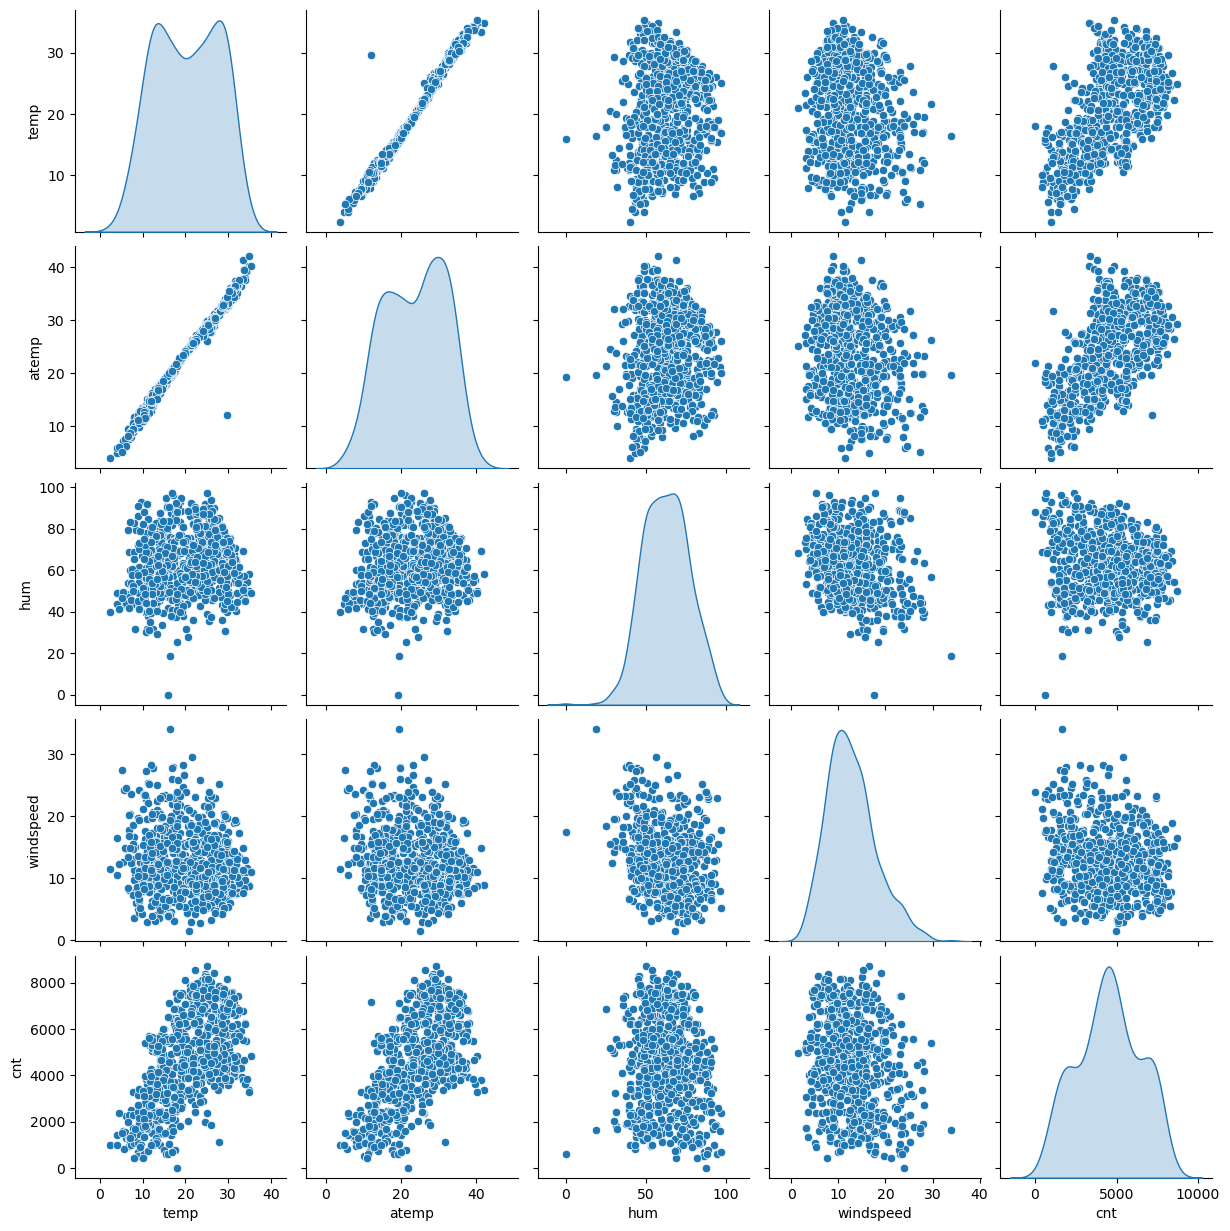

In [858]:
# Drawing pairplot for numeric columns

sns.color_palette("mako", as_cmap=True)
sns.pairplot(data = bike_df, vars=[ 'temp', 'atemp', 'hum', 'windspeed','cnt'], 
             diag_kind = 'kde')
plt.show()

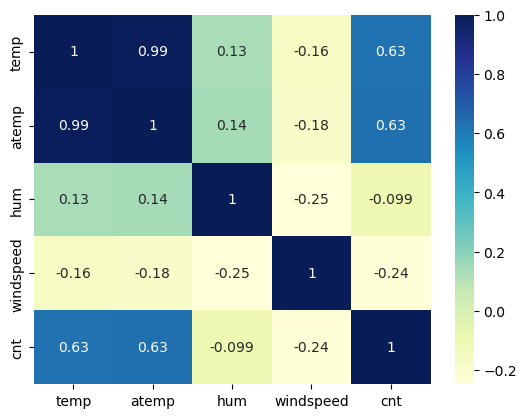

In [859]:
# Visualizing correlation among numeric columns

sns.heatmap(bike_df[['temp', 'atemp', 'hum', 'windspeed','cnt']].corr(), cmap='YlGnBu', annot = True)
plt.show()

### Creating dummy variables

In [860]:
bike_df = pd.get_dummies(data=bike_df,columns=["season"],drop_first=True, dtype=int)
bike_df = pd.get_dummies(data=bike_df,columns=["mnth"],drop_first=True, dtype=int)
bike_df = pd.get_dummies(data=bike_df,columns=["weekday"],drop_first=True, dtype=int)
bike_df = pd.get_dummies(data=bike_df,columns=["weathersit"],drop_first=True, dtype=int)

bike_df.shape

(730, 30)

In [861]:
bike_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_mist,weathersit_snow
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


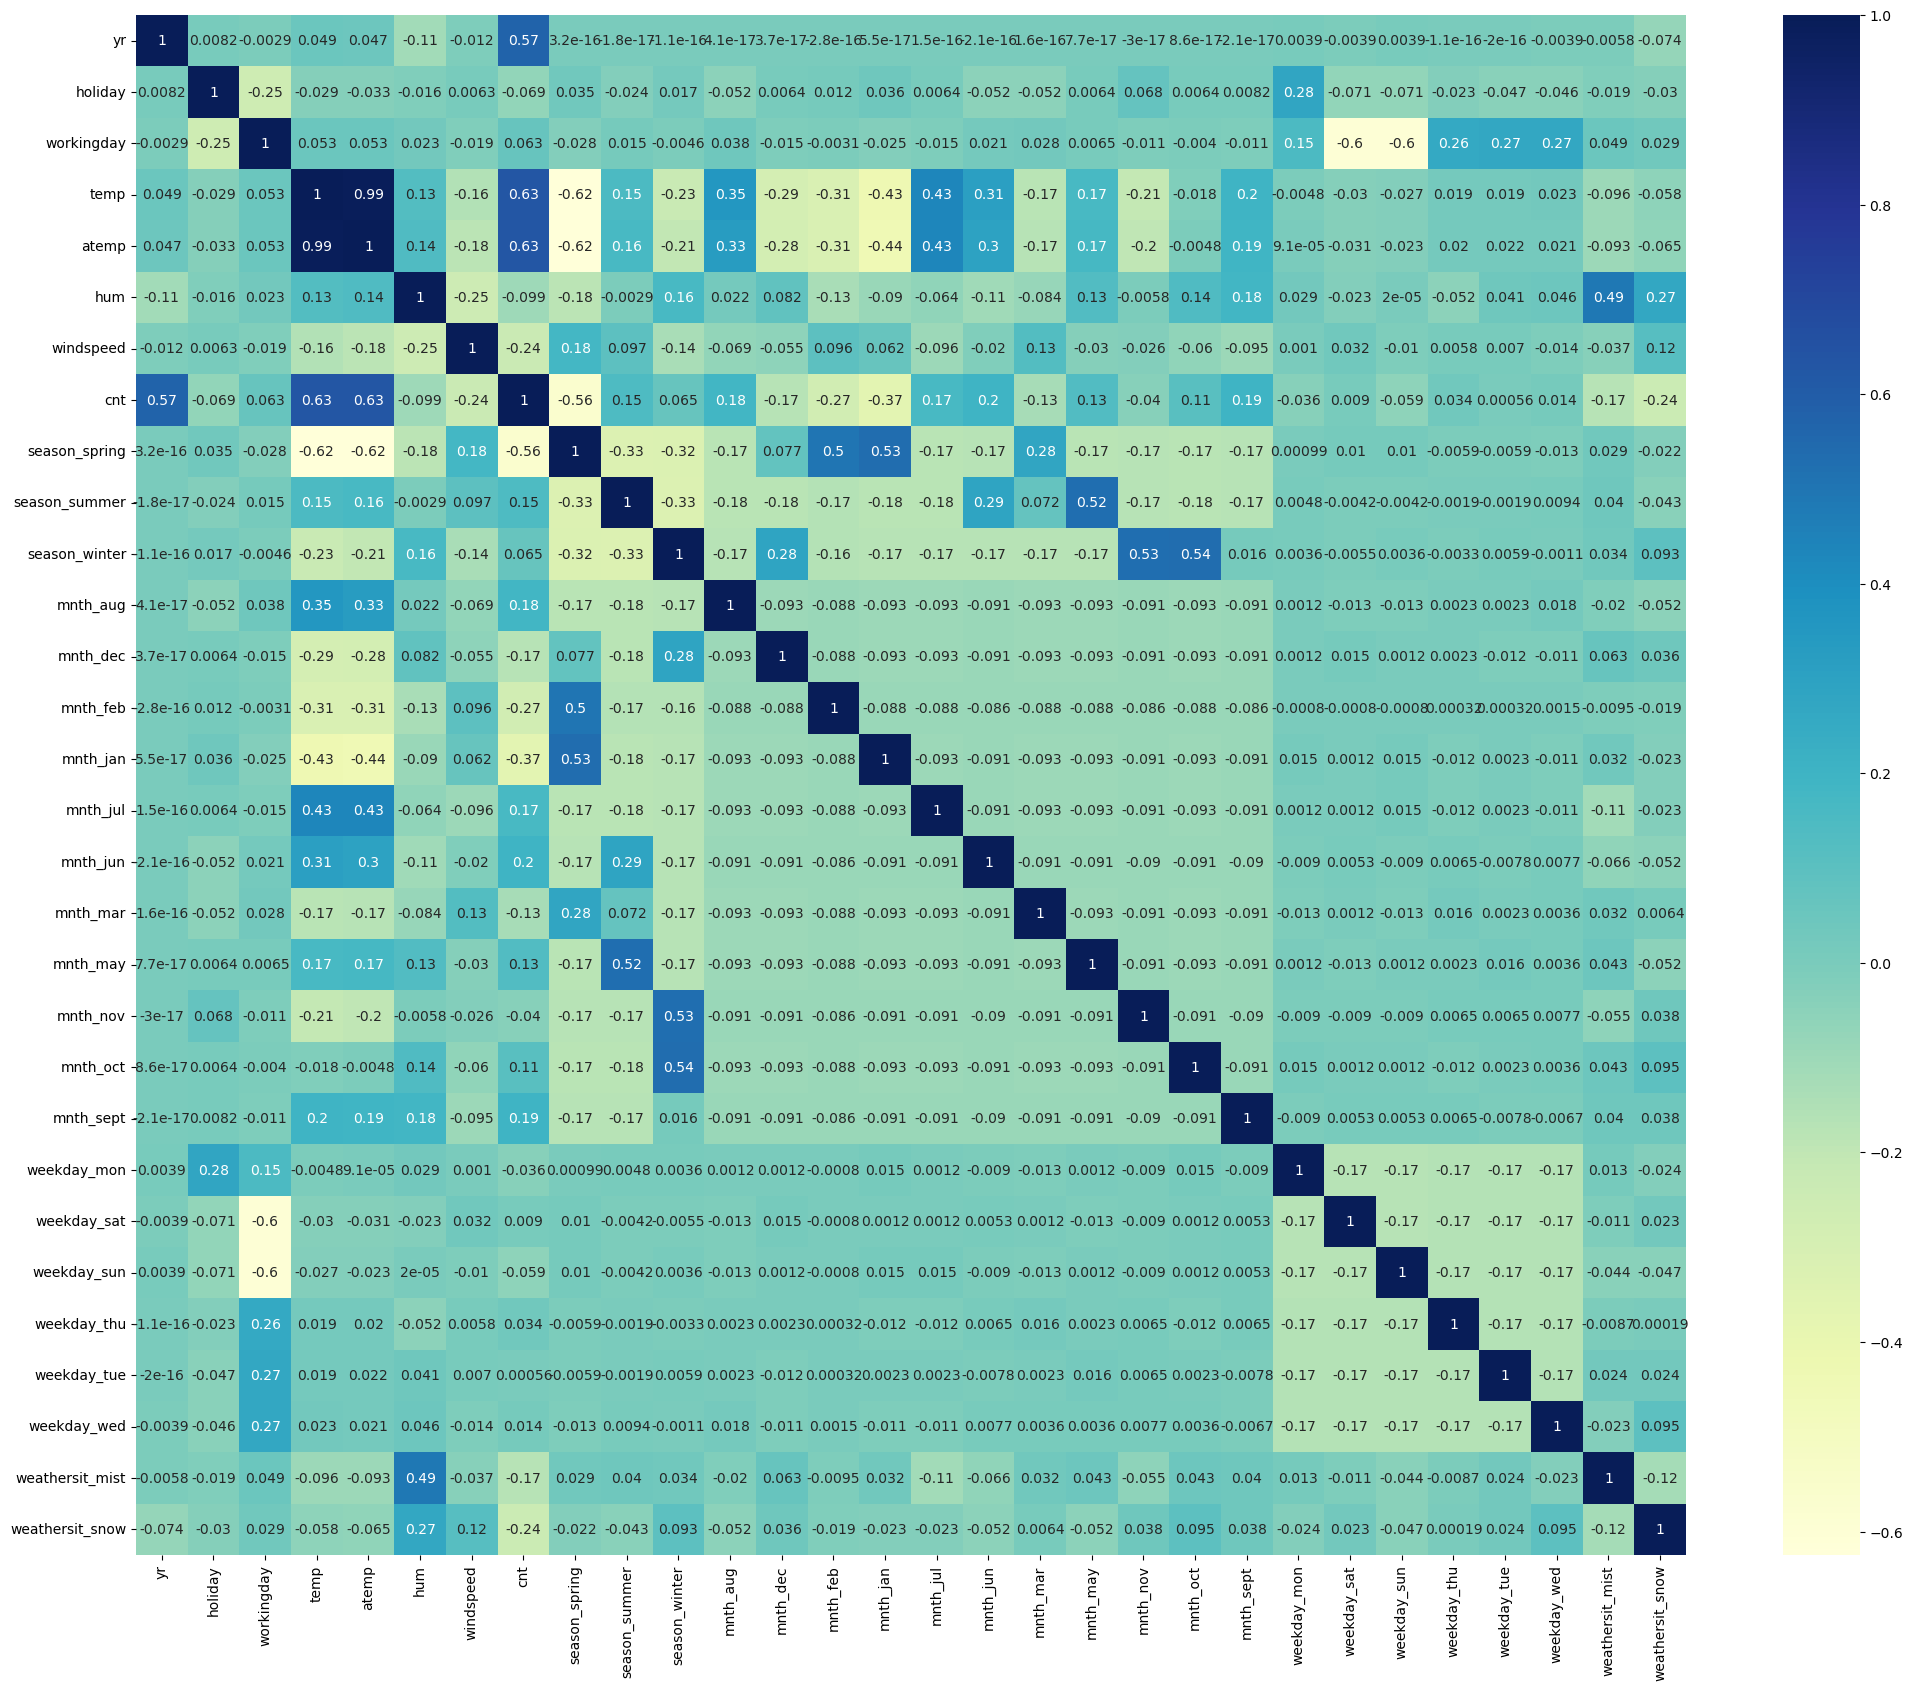

In [862]:
plt.figure(figsize = (25,20))
sns.heatmap(bike_df.corr(), annot = True, cmap="YlGnBu")
plt.show()

# Building Linear Regression Models

### Creating training and test datasets

In [863]:
bike_training_set, bike_testing_set = train_test_split(bike_df, train_size=0.7, random_state = 100)
print(bike_training_set.shape)
print(bike_testing_set.shape)

(510, 30)
(220, 30)


In [864]:
rescale_columns = ['temp', 'atemp', 'hum', 'windspeed','cnt']

scaler = MinMaxScaler()

bike_training_set[rescale_columns] = scaler.fit_transform(bike_training_set[rescale_columns])
bike_training_set.describe()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_mist,weathersit_snow
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.096078,0.084314,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.345098,0.029412
std,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.294988,0.278131,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Method for creating linear regression models

In [865]:
def buildLRModel(X_train_param, y_train_param):
    X_train_sm = sm.add_constant(X_train_param)
    
    #create linear regression model using OLS
    lr = sm.OLS(y_train_param, X_train_sm)
    lr_model = lr.fit()
    return lr_model

In [866]:
# Creating y_train & X_train

y_train = bike_training_set.pop('cnt')
X_train = bike_training_set

### Model # 1

In [867]:
# add a constant as an intercept is not added by default by statsmodels

lr_model = buildLRModel(X_train, y_train)
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          2.81e-180
Time:                        22:09:33   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2433      0.035     

#### Computing VIF

In [868]:
def computeVIF (X_train_param):
    vif = pd.DataFrame()
    vif['Features'] = X_train_param.columns
    vif['VIF'] = [variance_inflation_factor(X_train_param.values, i) for i in range(X_train_param.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = 'VIF', ascending = False)
    return vif

In [869]:
vif = computeVIF(X_train)
vif

,Features,VIF
2,workingday,85.56
3,temp,66.90
4,atemp,56.03
22,weekday_sat,19.71
23,weekday_sun,18.34
7,season_spring,10.77
9,season_winter,9.46
8,season_summer,8.29
18,mnth_nov,6.79
10,mnth_aug,6.47


#### Inference:-

1. We built our first linear regression model using all the predictors.
2. We can see abnormally high VIF for a few predictors.
3. We also have very high p-values for many predictors.

#### First we will employ RFE to refine the linear regression model.

##### We will suffix A in model number to identify models created using (A)utomated / Hybrid RFE approach. We will suffix M in model number to identify models created using (M)anual approach

### Recursive Feature Elimination (RFE)

In [870]:
linearModel = LinearRegression()
linearModel.fit(X_train, y_train)
rfe = RFE(linearModel, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 8),
 ('mnth_dec', False, 4),
 ('mnth_feb', False, 5),
 ('mnth_jan', False, 2),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 14),
 ('mnth_mar', False, 15),
 ('mnth_may', False, 6),
 ('mnth_nov', False, 3),
 ('mnth_oct', False, 11),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 9),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 12),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 13),
 ('weathersit_mist', True, 1),
 ('weathersit_snow', True, 1)]

In [871]:
# Creating X_train for RFE

selected_cols = X_train.columns[rfe.support_]
X_train_tmp = X_train[selected_cols]
X_train_tmp.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_jul,mnth_sept,weekday_sat,weekday_sun,weathersit_mist,weathersit_snow
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,1,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,1,0


### Model # 2A

In [872]:
lr_model = buildLRModel(X_train_tmp, y_train)
print(lr_model.summary())

vif = computeVIF(X_train_tmp)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          2.11e-191
Time:                        22:09:33   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1995      0.028     

,Features,VIF
2,workingday,50.68
11,weekday_sat,12.20
12,weekday_sun,11.79
6,season_spring,5.02
3,temp,3.62
8,season_winter,3.49
1,holiday,2.91
7,season_summer,2.62
4,hum,1.91
13,weathersit_mist,1.57


##### Inference:-

1. workingday has maximum VIF of 50.68
2. holiday has maximum p-value of 0.386
3. weekday_sat, weekday_sun, season_spring also have VIF more than 5

We will drop holiday and build another model.

### Model # 3A

In [873]:
X_train_tmp = X_train_tmp.drop(['holiday'], axis=1)

lr_model = buildLRModel(X_train_tmp, y_train)
print(lr_model.summary())
vif = computeVIF(X_train_tmp)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          2.11e-191
Time:                        22:09:33   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1811      0.042     

,Features,VIF
3,hum,32.10
2,temp,18.99
1,workingday,18.41
4,windspeed,4.91
10,weekday_sat,4.91
5,season_spring,4.80
11,weekday_sun,4.76
7,season_winter,3.69
6,season_summer,3.04
12,weathersit_mist,2.31


##### Inference
1. All the features have low p-value.
2. hum, temp, workingday have high VIF.

We will drop workigday and build another model

### Model # 4A

In [874]:
X_train_tmp = X_train_tmp.drop(['workingday'], axis=1)

lr_model = buildLRModel(X_train_tmp, y_train)
print(lr_model.summary())
vif = computeVIF(X_train_tmp)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.3
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          4.02e-189
Time:                        22:09:33   Log-Likelihood:                 509.40
No. Observations:                 510   AIC:                            -990.8
Df Residuals:                     496   BIC:                            -931.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2804      0.035     

,Features,VIF
2,hum,28.24
1,temp,16.06
3,windspeed,4.68
4,season_spring,4.02
6,season_winter,3.34
5,season_summer,2.79
11,weathersit_mist,2.30
0,yr,2.08
7,mnth_jul,1.59
8,mnth_sept,1.38


##### Inference
1. weekday_sat has high p-value so we will eliminate it to build next model.

### Model # 5A

In [875]:
X_train_tmp = X_train_tmp.drop(['weekday_sat'], axis=1)

lr_model = buildLRModel(X_train_tmp, y_train)
print(lr_model.summary())
vif = computeVIF(X_train_tmp)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     219.9
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          5.65e-190
Time:                        22:09:33   Log-Likelihood:                 508.62
No. Observations:                 510   AIC:                            -991.2
Df Residuals:                     497   BIC:                            -936.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2839      0.035     

,Features,VIF
2,hum,28.23
1,temp,16.04
3,windspeed,4.65
4,season_spring,4.00
6,season_winter,3.33
5,season_summer,2.79
10,weathersit_mist,2.30
0,yr,2.08
7,mnth_jul,1.59
8,mnth_sept,1.38


##### Inference
1. hum has highest VIF.
2. All other predictors have p-values < 0.05

Dropping hum to create another model.

### Model # 6A

In [876]:
X_train_tmp = X_train_tmp.drop(['hum'], axis=1)

lr_model = buildLRModel(X_train_tmp, y_train)
print(lr_model.summary())
vif = computeVIF(X_train_tmp)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.0
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          3.37e-187
Time:                        22:09:33   Log-Likelihood:                 499.22
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     498   BIC:                            -923.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2034      0.030     

,Features,VIF
1,temp,5.14
2,windspeed,4.60
4,season_summer,2.23
3,season_spring,2.09
0,yr,2.07
5,season_winter,1.80
6,mnth_jul,1.59
9,weathersit_mist,1.55
7,mnth_sept,1.33
8,weekday_sun,1.17


##### Inference
1. R-squared score is pretty high: 0.836
2. Adjusted R-squared score is pretty high: 0.832
3. F-statistic score is good : 230
4. Prob (F-statistic) is nearly zero
5. All p-values are smaller than 0.05
6. temp VIF is a little higher than 5

This seems to be a significant model. Can we further reduce temp's VIF by dropping mnth_jul. Reason for the selection is its p-value 0.01, which is highest among all other features.

### Model # 7A

In [877]:
X_train_tmp = X_train_tmp.drop(['mnth_jul'], axis=1)

lr_model = buildLRModel(X_train_tmp, y_train)
print(lr_model.summary())
vif = computeVIF(X_train_tmp)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.5
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          5.70e-187
Time:                        22:09:33   Log-Likelihood:                 495.81
No. Observations:                 510   AIC:                            -969.6
Df Residuals:                     499   BIC:                            -923.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1956      0.030     

,Features,VIF
2,windspeed,4.59
1,temp,3.90
0,yr,2.07
3,season_spring,2.00
4,season_summer,1.91
5,season_winter,1.64
8,weathersit_mist,1.55
6,mnth_sept,1.22
7,weekday_sun,1.17
9,weathersit_snow,1.08


##### Inference
1. R-squared score is pretty high: 0.833
2. Adjusted R-squared score is pretty high: 0.83
3. F-statistic score is good : 249.5
4. Prob (F-statistic) is nearly zero
5. All p-values are smaller than 0.05
6. temp VIF is less than 5. All the predictors have VIF < 5

##### This model seems to be significant and can be considered as final model. We will do Residual analysis and other predictions using this model.

### Residual Analysis

In [878]:
# Adding coefficient to X_train_tmp

X_train_sm = sm.add_constant(X_train_tmp)

y_train_pred = lr_model.predict(X_train_sm)

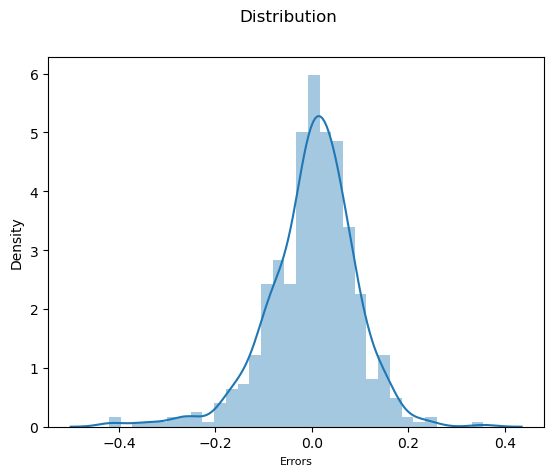

In [879]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred))
fig.suptitle('Distribution', fontsize = 12)
plt.xlabel('Errors', fontsize = 8)
plt.show()

##### Inference
1. Errors are normally distributed.
2. Distribution is centered around 0.

### Making Predictions

Before we can make predictions, we must scale test data set.

In [880]:
# Scaling test data

bike_test_tmp = bike_testing_set.copy(deep= True)

bike_test_tmp[rescale_columns] = scaler.transform(bike_test_tmp[rescale_columns])

# Creating y_test and X_test
y_test = bike_test_tmp.pop('cnt')
X_test = bike_test_tmp

In [881]:
X_test = X_test[X_train_tmp.columns]
X_test.head()

,yr,temp,windspeed,season_spring,season_summer,season_winter,mnth_sept,weekday_sun,weathersit_mist,weathersit_snow
184,0,0.831783,0.084219,0,0,0,0,0,1,0
535,1,0.901354,0.153728,0,1,0,0,0,0,0
299,0,0.511964,0.334206,0,0,1,0,0,1,0
221,0,0.881625,0.339570,0,0,0,0,0,0,0
152,0,0.817246,0.537414,0,1,0,0,0,0,0


In [882]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr_model.predict(X_test_sm)

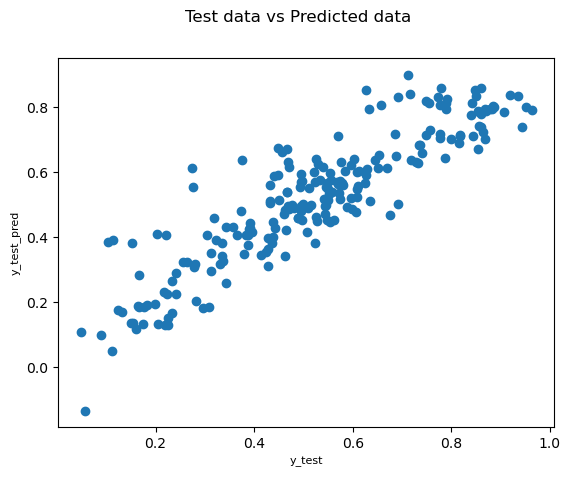

In [883]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('Test data vs Predicted data', fontsize = 12)
plt.xlabel('y_test', fontsize = 8)
plt.ylabel('y_test_pred', fontsize = 8)
plt.show()

##### Inference
Predicted values are within a close range.

### R-squared score calculation

In [884]:
r2_score_test = r2_score(y_test, y_test_pred)
print(r2_score_test)

0.8031908103816627


##### Inference

R-squared score for test data is pretty high and it comes out to 0.80

### Creating Linear Regression Models - Manual Approach

In [885]:
# We will start with dropping mnth_oct from the original X_train & y_train

X_train_tmp = X_train.drop(['mnth_oct'], axis=1)

lr_model = buildLRModel(X_train_tmp, y_train)
print(lr_model.summary())
vif = computeVIF(X_train_tmp)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          2.80e-181
Time:                        22:09:34   Log-Likelihood:                 527.10
No. Observations:                 510   AIC:                            -998.2
Df Residuals:                     482   BIC:                            -879.6
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2459      0.033     

,Features,VIF
2,workingday,76.10
3,temp,66.90
4,atemp,56.02
21,weekday_sat,17.49
22,weekday_sun,16.31
7,season_spring,10.77
9,season_winter,7.20
8,season_summer,6.84
10,mnth_aug,4.97
14,mnth_jul,4.45


##### Inference
1. p-values are high for multiple features.
2. VIF is also > 5 for multiple features.
3. atemp has both very high p-value and VIF

We will proceed with dropping atemp.

### Model # 2M

In [886]:
# dropping atemp

X_train_tmp = X_train_tmp.drop(['atemp'], axis=1)

lr_model = buildLRModel(X_train_tmp, y_train)
print(lr_model.summary())
vif = computeVIF(X_train_tmp)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     107.4
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          2.93e-182
Time:                        22:09:34   Log-Likelihood:                 527.00
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     483   BIC:                            -885.7
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2456      0.033     

,Features,VIF
2,workingday,76.07
20,weekday_sat,17.49
21,weekday_sun,16.31
6,season_spring,10.75
8,season_winter,7.18
3,temp,7.08
7,season_summer,6.81
9,mnth_aug,4.86
13,mnth_jul,4.42
12,mnth_jan,4.37


##### Inference
1. VIF for temp has fallen.
2. There still are few features with high VIF.
3. There are multiple features with high p-value.

mnth_mar has very high p-value of 0.947. We will build our next model after dropping it.

### Model # 3M


In [887]:
# dropping mnth_mar

X_train_tmp = X_train_tmp.drop(['mnth_mar'], axis=1)

lr_model = buildLRModel(X_train_tmp, y_train)
print(lr_model.summary())
vif = computeVIF(X_train_tmp)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     111.9
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          2.74e-183
Time:                        22:09:34   Log-Likelihood:                 527.00
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     484   BIC:                            -891.9
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2452      0.032     

,Features,VIF
2,workingday,72.24
19,weekday_sat,16.60
20,weekday_sun,15.58
6,season_spring,9.25
8,season_winter,7.12
3,temp,6.87
7,season_summer,6.81
9,mnth_aug,4.80
13,mnth_jul,4.39
1,holiday,3.96


##### Inference
1. workingday still has very high VIF of 72.24
2. mnth_jun has the highest p-value of 0.896

Building another model after dropping mnth_jun

### Model # 4M

In [888]:
# dropping mnth_jun

X_train_tmp = X_train_tmp.drop(['mnth_jun'], axis=1)

lr_model = buildLRModel(X_train_tmp, y_train)
print(lr_model.summary())
vif = computeVIF(X_train_tmp)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     116.8
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          2.53e-184
Time:                        22:09:34   Log-Likelihood:                 526.99
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     485   BIC:                            -898.1
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2453      0.032     

,Features,VIF
2,workingday,72.11
18,weekday_sat,16.55
19,weekday_sun,15.54
6,season_spring,8.55
7,season_summer,6.60
8,season_winter,6.27
3,temp,4.92
1,holiday,3.96
9,mnth_aug,3.17
13,mnth_jul,2.81


##### Inference
1. temp VIF is now less than 5.
2. There is no significant drop in the VIF of workingday.
3. weekday_wed has high p-value.

### Model # 5M

In [889]:
# dropping weekday_wed

X_train_tmp = X_train_tmp.drop(['weekday_wed'], axis=1)

lr_model = buildLRModel(X_train_tmp, y_train)
print(lr_model.summary())
vif = computeVIF(X_train_tmp)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.1
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          2.42e-185
Time:                        22:09:34   Log-Likelihood:                 526.92
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     486   BIC:                            -904.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2447      0.032     

,Features,VIF
2,workingday,70.18
18,weekday_sat,16.52
19,weekday_sun,15.51
6,season_spring,8.55
7,season_summer,6.60
8,season_winter,6.27
3,temp,4.92
1,holiday,3.91
9,mnth_aug,3.17
13,mnth_jul,2.81


##### Inference
1. There is slight drop in VIF of workingday.
2. There are only a few predictors left with high p-values.

holiday seems to have the highest p-value so we will drop it for the next model.

### Model # 6M

In [890]:
# dropping holiday

X_train_tmp = X_train_tmp.drop(['holiday'], axis=1)

lr_model = buildLRModel(X_train_tmp, y_train)
print(lr_model.summary())
vif = computeVIF(X_train_tmp)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.1
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          2.42e-185
Time:                        22:09:35   Log-Likelihood:                 526.92
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     486   BIC:                            -904.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2539      0.048     

,Features,VIF
3,hum,36.38
2,temp,24.25
1,workingday,20.83
5,season_spring,8.39
6,season_summer,6.70
7,season_winter,6.69
17,weekday_sat,5.91
18,weekday_sun,5.58
4,windspeed,5.13
8,mnth_aug,3.26


##### Inference
1. There is a significant drop in the VIF of workingday.
2. VIF of hum & temp have increased multifold.

weekday_thu will be dropped for the next model as it has highest p-value.

### Model # 7M

In [891]:
# dropping weekday_thu

X_train_tmp = X_train_tmp.drop(['weekday_thu'], axis=1)

lr_model = buildLRModel(X_train_tmp, y_train)
print(lr_model.summary())
vif = computeVIF(X_train_tmp)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     127.9
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          2.36e-186
Time:                        22:09:35   Log-Likelihood:                 526.81
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     487   BIC:                            -910.2
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2512      0.048     

,Features,VIF
3,hum,36.34
2,temp,24.14
1,workingday,20.80
5,season_spring,8.36
6,season_summer,6.68
7,season_winter,6.68
17,weekday_sat,5.81
18,weekday_sun,5.49
4,windspeed,5.12
8,mnth_aug,3.26


##### Inference
1. mnth_aug will be dropped and a new model will be created due to its high p-value

### Model # 8M

In [892]:
# dropping mnth_aug

X_train_tmp = X_train_tmp.drop(['mnth_aug'], axis=1)

lr_model = buildLRModel(X_train_tmp, y_train)
print(lr_model.summary())
vif = computeVIF(X_train_tmp)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     134.1
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          2.47e-187
Time:                        22:09:35   Log-Likelihood:                 526.59
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     488   BIC:                            -916.0
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2594      0.046     

,Features,VIF
3,hum,35.48
2,temp,22.61
1,workingday,19.86
5,season_spring,6.09
16,weekday_sat,5.52
17,weekday_sun,5.30
4,windspeed,5.09
7,season_winter,4.45
6,season_summer,3.76
10,mnth_jan,2.43


##### Inference
1. hum, temp, workingday continue to have very high VIF.
2. p-value of weekday_tue is highest among all other features.

### Model # 9M

In [893]:
# dropping weekday_tue

X_train_tmp = X_train_tmp.drop(['weekday_tue'], axis=1)

lr_model = buildLRModel(X_train_tmp, y_train)
print(lr_model.summary())
vif = computeVIF(X_train_tmp)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     140.7
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          3.51e-188
Time:                        22:09:35   Log-Likelihood:                 526.03
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     489   BIC:                            -921.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2580      0.046     

,Features,VIF
3,hum,35.40
2,temp,22.60
1,workingday,19.79
5,season_spring,6.09
16,weekday_sat,5.49
17,weekday_sun,5.26
4,windspeed,5.09
7,season_winter,4.45
6,season_summer,3.75
10,mnth_jan,2.43


##### Inference
1. Not much movement in VIF is noticed.

Dropping weekday_mon owing to its high p-value.

### Model # 10M 

In [894]:
# dropping weekday_mon

X_train_tmp = X_train_tmp.drop(['weekday_mon'], axis=1)

lr_model = buildLRModel(X_train_tmp, y_train)
print(lr_model.summary())
vif = computeVIF(X_train_tmp)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.0
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          5.20e-189
Time:                        22:09:35   Log-Likelihood:                 525.39
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     490   BIC:                            -926.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2478      0.045     

,Features,VIF
3,hum,34.75
2,temp,22.48
1,workingday,19.11
5,season_spring,6.06
15,weekday_sat,5.10
4,windspeed,5.06
16,weekday_sun,4.89
7,season_winter,4.40
6,season_summer,3.71
10,mnth_jan,2.42


##### Inference
1. mnth_may shall be dropped as its p-value is the highest among all other predictors.

### Model # 11M

In [895]:
# dropping mnth_may

X_train_tmp = X_train_tmp.drop(['mnth_may'], axis=1)

lr_model = buildLRModel(X_train_tmp, y_train)
print(lr_model.summary())
vif = computeVIF(X_train_tmp)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     155.9
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          9.80e-190
Time:                        22:09:35   Log-Likelihood:                 524.48
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     491   BIC:                            -930.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2368      0.045     

,Features,VIF
3,hum,34.64
2,temp,22.30
1,workingday,18.92
5,season_spring,6.05
14,weekday_sat,5.04
4,windspeed,4.99
15,weekday_sun,4.85
7,season_winter,4.40
6,season_summer,3.11
10,mnth_jan,2.42


##### Inference
1. No significant drop in VIF of hum, temp, workingday
2. mnth_feb has highest p-value

### Model # 12M

In [896]:
# dropping mnth_feb

X_train_tmp = X_train_tmp.drop(['mnth_feb'], axis=1)

lr_model = buildLRModel(X_train_tmp, y_train)
print(lr_model.summary())
vif = computeVIF(X_train_tmp)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     164.4
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          2.52e-190
Time:                        22:09:35   Log-Likelihood:                 523.22
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     492   BIC:                            -934.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2235      0.044     

,Features,VIF
3,hum,34.19
2,temp,21.56
1,workingday,18.84
5,season_spring,5.06
13,weekday_sat,5.03
4,windspeed,4.99
14,weekday_sun,4.83
7,season_winter,4.40
6,season_summer,3.09
15,weathersit_mist,2.35


##### Inference
weekday_sun has slightly higher p-value.

### Model # 13M

In [897]:
# dropping weekday_sun

X_train_tmp = X_train_tmp.drop(['weekday_sun'], axis=1)

lr_model = buildLRModel(X_train_tmp, y_train)
print(lr_model.summary())
vif = computeVIF(X_train_tmp)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     173.5
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          1.20e-190
Time:                        22:09:35   Log-Likelihood:                 521.29
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     493   BIC:                            -936.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2690      0.037     

,Features,VIF
3,hum,31.08
2,temp,18.94
1,workingday,4.77
4,windspeed,4.77
5,season_spring,4.50
7,season_winter,4.11
6,season_summer,2.88
14,weathersit_mist,2.32
0,yr,2.09
13,weekday_sat,1.86


##### Inference:-

1. VIF has dropped for all other features. Now only hum & temp have VIF > 5
2. Now there is no feature left with p-value > 0.05, so we will target features having high VIF

### Model # 14M

In [898]:
# dropping hum

X_train_tmp = X_train_tmp.drop(['hum'], axis=1)

lr_model = buildLRModel(X_train_tmp, y_train)
print(lr_model.summary())
vif = computeVIF(X_train_tmp)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     178.7
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          1.84e-188
Time:                        22:09:35   Log-Likelihood:                 513.34
No. Observations:                 510   AIC:                            -994.7
Df Residuals:                     494   BIC:                            -926.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1985      0.033     

,Features,VIF
2,temp,6.92
1,workingday,4.74
3,windspeed,4.71
4,season_spring,3.09
6,season_winter,3.03
5,season_summer,2.33
0,yr,2.08
12,weekday_sat,1.86
10,mnth_nov,1.79
8,mnth_jan,1.67


##### Inference
1. Dropping hum significantly dropped temp's VIF.

Since temp's VIF is still > 6.92, we will drop workingday (next highest VIF), and evaluate the new model. If the results are favourable, we will continue with it.

### Model # 15M

In [899]:
# dropping workingday

X_train_tmp = X_train_tmp.drop(['workingday'], axis=1)

lr_model = buildLRModel(X_train_tmp, y_train)
print(lr_model.summary())
vif = computeVIF(X_train_tmp)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     180.9
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          2.61e-184
Time:                        22:09:35   Log-Likelihood:                 500.71
No. Observations:                 510   AIC:                            -971.4
Df Residuals:                     495   BIC:                            -907.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2424      0.032     

,Features,VIF
1,temp,5.19
2,windspeed,4.69
5,season_winter,2.96
3,season_spring,2.88
4,season_summer,2.24
0,yr,2.07
9,mnth_nov,1.79
7,mnth_jan,1.66
8,mnth_jul,1.59
12,weathersit_mist,1.56


##### Inference
1. temp's VIF is now slightly more than 5. The R-Squared value has not dropped dramatically. Other indicators are also showing favourable numbers. We will accept this model and build further model on top of it.
2. A couple of features have p-values near 0.05. We can drop them one by one and see the impact on the overall model. If the results are good, we can proceed further.

### Model # 16M

In [900]:
# dropping season_summer

X_train_tmp = X_train_tmp.drop(['season_summer'], axis=1)

lr_model = buildLRModel(X_train_tmp, y_train)
print(lr_model.summary())
vif = computeVIF(X_train_tmp)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     192.9
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          2.08e-184
Time:                        22:09:35   Log-Likelihood:                 498.20
No. Observations:                 510   AIC:                            -968.4
Df Residuals:                     496   BIC:                            -909.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2869      0.026     

,Features,VIF
1,temp,4.70
2,windspeed,4.08
4,season_winter,2.56
3,season_spring,2.35
0,yr,2.06
8,mnth_nov,1.79
6,mnth_jan,1.65
11,weathersit_mist,1.53
5,mnth_dec,1.47
7,mnth_jul,1.36


##### Inference
1. After dropping season_summer, we can see temp's VIF well within 5.
2. R-squared score is also holding up.
3. weekday_sat's p-value is nearly 0.05 (though a little less), but we can drop it and see its effect on the model.

#### Model # 17M

In [901]:
# dropping weekday_sat

X_train_tmp = X_train_tmp.drop(['weekday_sat'], axis=1)

lr_model = buildLRModel(X_train_tmp, y_train)
print(lr_model.summary())
vif = computeVIF(X_train_tmp)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     207.4
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          1.08e-184
Time:                        22:09:35   Log-Likelihood:                 496.10
No. Observations:                 510   AIC:                            -966.2
Df Residuals:                     497   BIC:                            -911.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2901      0.026     

,Features,VIF
1,temp,4.66
2,windspeed,4.05
4,season_winter,2.55
3,season_spring,2.35
0,yr,2.06
8,mnth_nov,1.79
6,mnth_jan,1.65
10,weathersit_mist,1.53
5,mnth_dec,1.46
7,mnth_jul,1.36


##### Inference
1. All the features have VIF less than 5.
2. All the features have near 0 p-values.
3. R-squared is 0.834 which is pretty good.
4. F-statistics is 207.4 which is a good indicator.
5. Prob (F-statistic) is 1.08e-184 which is nearly 0.

Though we have 12 features, yet, the model is a significant one and we will take it as the final model. Now we will perform Residual analysis and predictions.

### Residual Analysis

In [902]:
# Adding coefficient to X_train_tmp

X_train_sm = sm.add_constant(X_train_tmp)

y_train_pred = lr_model.predict(X_train_sm)

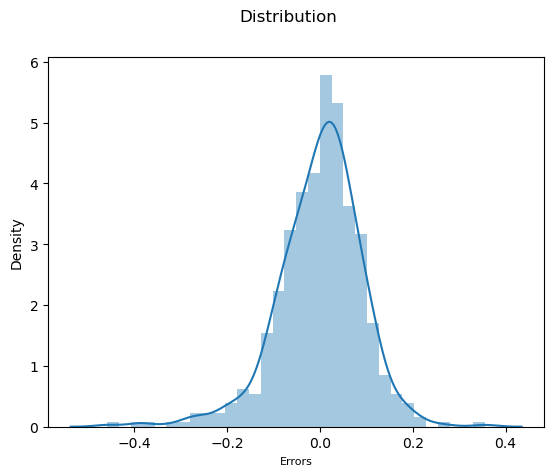

In [903]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred))
fig.suptitle('Distribution', fontsize = 12)
plt.xlabel('Errors', fontsize = 8)
plt.show()

##### Inference
1. Errors are normally distributed.
2. Distribution is centered around 0.

### Making Predictions

Before we can make predictions, we must scale test data set.

In [904]:
# Scaling test data

bike_test_tmp = bike_testing_set.copy(deep= True)

bike_test_tmp[rescale_columns] = scaler.transform(bike_test_tmp[rescale_columns])

# Creating y_test and X_test
y_test = bike_test_tmp.pop('cnt')
X_test = bike_test_tmp

In [905]:
X_test = X_test[X_train_tmp.columns]
X_test.head()

,yr,temp,windspeed,season_spring,season_winter,mnth_dec,mnth_jan,mnth_jul,mnth_nov,mnth_sept,weathersit_mist,weathersit_snow
184,0,0.831783,0.084219,0,0,0,0,1,0,0,1,0
535,1,0.901354,0.153728,0,0,0,0,0,0,0,0,0
299,0,0.511964,0.334206,0,1,0,0,0,0,0,1,0
221,0,0.881625,0.339570,0,0,0,0,0,0,0,0,0
152,0,0.817246,0.537414,0,0,0,0,0,0,0,0,0


In [906]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr_model.predict(X_test_sm)

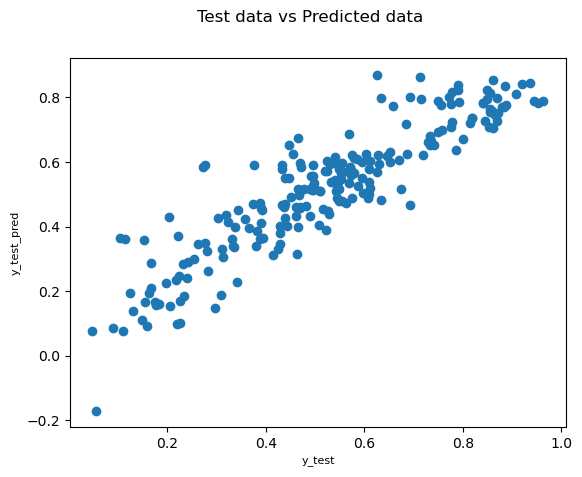

In [907]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('Test data vs Predicted data', fontsize = 12)
plt.xlabel('y_test', fontsize = 8)
plt.ylabel('y_test_pred', fontsize = 8)
plt.show()

##### Inference
Predicted values are within a close range.

### R-squared score calculation

In [908]:
r2_score_test = r2_score(y_test, y_test_pred)
print(r2_score_test)

0.8168625651669512


##### Inference

R-squared score for test data is pretty high and it comes out to approx 0.82

### RFE/Hybrid Model vs Manual Model

RFE/Hybrid R-squared score for training data:-   0.833
Manual model R-squared score for training data:- 0.834

RFE/Hybrid R-squared score for test data:-   0.8031
Manual model R-squared score for test data:- 0.8168

### Recommendations

1. yr, temp, season_winter have positive coefficient, so the company must plan business activities around these key factors.
2. mnth_sept & season_summer are also opportunities for the company.
3. bike rental service has seen grown year over year. Hence, with right strategies, the BoomingBike may be able to scale up its business.
4. windspeed, weathersit_snow, weathersit_mist negatively impact company's business. Company may plan overhauling of its assets during such downtimes.
5. season_spring also has negative impact on rental business. Company may wish to come up with promotional offers to generate business opportunities in that season.